In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST data for demonstration
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the data
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the model
def create_mlp(input_dim, num_classes):
    model = Sequential()
    
    # Input layer
    model.add(Dense(128, input_dim=input_dim))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(Dropout(0.2))
    
    # Hidden layers
    for _ in range(8):
        model.add(Dense(64))
        model.add(BatchNormalization())
        model.add(tf.keras.layers.Activation('relu'))
        model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

input_dim = x_train.shape[1]
num_classes = y_train.shape[1]

model = create_mlp(input_dim, num_classes)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Setup Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=3, 
    min_lr=0.00001)

# Train the model
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')


/Users/s223171213/Documents/machine-learning-docs/.mld-venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/Users/s223171213/Documents/machine-learning-docs/.mld-venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-27 11:31:47.317282: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-05-27 11:31:47.317300: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-05-27 11:31:47.317303: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-05-27 11:31:47.317335: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-27 11:31:47.317347: I tensorflow/core/common_runtime/pluggable_device/pluggabl

Epoch 1/10


2024-05-27 11:31:49.366796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 95s 59ms/step - accuracy: 0.3778 - loss: 1.7829 - val_accuracy: 0.9003 - val_loss: 0.3842 - learning_rate: 0.0010
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 96s 64ms/step - accuracy: 0.7903 - loss: 0.7368 - val_accuracy: 0.9377 - val_loss: 0.2548 - learning_rate: 0.0010
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 57ms/step - accuracy: 0.8595 - loss: 0.5449 - val_accuracy: 0.9517 - val_loss: 0.1908 - learning_rate: 0.0010
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 87s 58ms/step - accuracy: 0.8819 - loss: 0.4686 - val_accuracy: 0.9577 - val_loss: 0.1637 - learning_rate: 0.0010
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 86s 57ms/step - accuracy: 0.8996 - loss: 0.4125 - val_accuracy: 0.9618 - val_loss: 0.1499 - learning_rate: 0.0010
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 86s 58ms/step - accuracy: 0.9107 - loss: 0.3690 - val_accuracy: 0.9615 - val_loss: 0.1490 - learning_rate: 0.0010
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 86s 57ms/step - accuracy: 0.9182 

In [ ]:
import seaborn as sns

<Axes: >

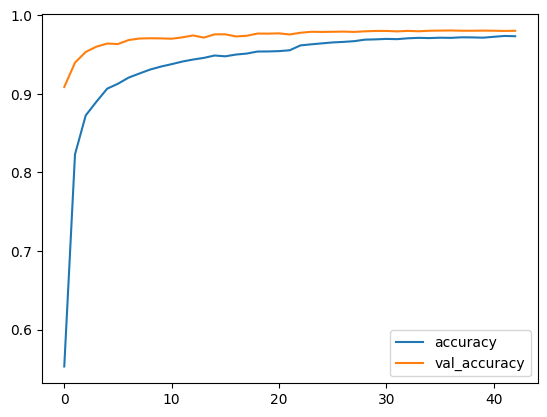

In [ ]:
sns.lineplot(history.history['accuracy'], label='accuracy')
sns.lineplot(history.history['val_accuracy'], label = 'val_accuracy')